# 基础CNN网络

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-rc0


## 构造数据

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


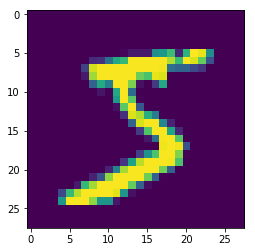

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(x_train[0])
plt.show()

In [6]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

## 构造网络

In [16]:
model = keras.Sequential()

### 卷积层

In [17]:
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))

### 池化层

In [18]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

### 全连接层

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))

# 分类层
model.add(layers.Dense(10, activation='softmax'))

## 模型配置

In [20]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


## 模型训练

In [21]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 10s 182us/sample - loss: 2.2005 - accuracy: 0.1979 - val_loss: 2.0715 - val_accuracy: 0.1988
Epoch 2/5
54000/54000 [==============================] - 10s 179us/sample - loss: 1.8655 - accuracy: 0.2753 - val_loss: 1.2395 - val_accuracy: 0.4647
Epoch 3/5
54000/54000 [==============================] - 10s 179us/sample - loss: 0.4463 - accuracy: 0.8594 - val_loss: 0.1363 - val_accuracy: 0.9645
Epoch 4/5
54000/54000 [==============================] - 9s 168us/sample - loss: 0.1087 - accuracy: 0.9691 - val_loss: 0.0848 - val_accuracy: 0.9753
Epoch 5/5
54000/54000 [==============================] - 9s 164us/sample - loss: 0.0711 - accuracy: 0.9789 - val_loss: 0.0857 - val_accuracy: 0.9782


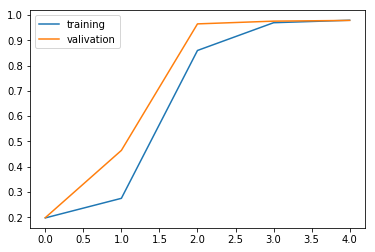

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [23]:
res = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================